In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
canada = pd.read_csv('../Resources/CanSIPS_IC3_FULL_LDC.csv')
canada['LDC_SST_CanSIPS_IC3'] = canada['LDC_SST_CanSIPS_IC3'] - 273.15
canada

,L,MON,LDC_SST_CanSIPS_IC3
0,1.5,0000 1 Jan 1991,26.5181
1,2.5,0000 1 Jan 1991,26.5216
2,3.5,0000 1 Jan 1991,26.6838
3,4.5,0000 1 Jan 1991,26.7414
4,5.5,0000 1 Jan 1991,26.4708
...,...,...,...
3595,6.5,0000 1 Dec 2020,25.4219
3596,7.5,0000 1 Dec 2020,25.0757
3597,8.5,0000 1 Dec 2020,24.6876
3598,9.5,0000 1 Dec 2020,24.4785


In [18]:
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)

# Calculate the mean grouped by 'L' and 'START'
canada_mean = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC3'].mean().reset_index()
canada_mean.rename(columns={'LDC_SST_CanSIPS_IC3': 'MEAN_SST_CanSIPS_IC3'}, inplace=True)

# Calculate the variance grouped by 'L' and 'START'
canada_var = canada.groupby(['L', 'START'])['LDC_SST_CanSIPS_IC3'].var().reset_index()
canada_var.rename(columns={'LDC_SST_CanSIPS_IC3': 'VAR_SST_CanSIPS_IC3'}, inplace=True)

# Merge the mean and variance DataFrames
canada_stat = pd.merge(canada_mean, canada_var, on=['L', 'START'])
canada_stat.head(20)

month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada_stat['TARGET'] = ((canada_stat['START'] + canada_stat['L']).astype(int))%12
canada_stat['TARGET'] = canada_stat['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada_stat['SZN'] = canada_stat['TARGET'].map(month_to_season)

new_order = ['L','START','TARGET','SZN','MEAN_SST_CanSIPS_IC3','VAR_SST_CanSIPS_IC3']
canada_stat = canada_stat[new_order]

canada_stat.to_csv('../Resources/canada_stat.csv', index=False)

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canada_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_stat[canada_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_canada.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_canada.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_canada = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    canada_stat_dfs[f'lead{lead}'] = filtered_canada
    
canada_stat_dfs['lead1']

,L,START,TARGET,SZN,MEAN_SST_CanSIPS_IC3,VAR_SST_CanSIPS_IC3
0,1.5,1,2,JFM,26.176020,1.407158
1,1.5,2,3,FMA,26.715343,0.890243
2,1.5,3,4,MAM,27.206257,0.510405
3,1.5,4,5,AMJ,27.371920,0.328093
4,1.5,5,6,MJJ,27.037603,0.507645
5,1.5,6,7,JJA,26.461720,0.799311
6,1.5,7,8,JAS,26.129220,1.045420
7,1.5,8,9,ASO,25.871583,1.185231
8,1.5,9,10,SON,25.961687,1.451488
9,1.5,10,11,OND,26.038453,1.817254


In [19]:
#access gfdl, cola, ncep, and nasa

gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')

lead_times = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
gfdl_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_stat[gfdl_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_gfdl.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_gfdl.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_gfdl = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    gfdl_stat_dfs[f'lead{lead}'] = filtered_gfdl


cola_stat = pd.read_csv('../Resources/cola_stat.csv')
cola_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_stat[cola_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_cola.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_cola.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_cola = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    cola_stat_dfs[f'lead{lead}'] = filtered_cola
    

ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
ncep_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_stat[ncep_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_ncep.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_ncep.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_ncep = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    ncep_stat_dfs[f'lead{lead}'] = filtered_ncep

nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
nasa_stat_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_stat[nasa_stat['L'] == i].copy()
    lead = int(i)
    j=1;
    
    while j < lead: 
        bottom_row = filtered_nasa.iloc[-1:]
        # Extract the DataFrame except the bottom row
        rest_of_df = filtered_nasa.iloc[:-1]
        # Concatenate the bottom row to the top of the rest of the DataFrame
        filtered_nasa = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
        j += 1
    
    nasa_stat_dfs[f'lead{lead}'] = filtered_nasa
 
#code that obtains the observed data and creates a doubled df ready for plotting
obs_nino3_4 = pd.read_csv('../Resources/obs_nino3_4.csv')

bottom_row = obs_nino3_4.iloc[1:]
rest_of_df = obs_nino3_4.iloc[:1]
        
obs_nino3_4 = pd.concat([bottom_row, rest_of_df]).reset_index(drop=True)
ncep_stat_dfs['lead5']

,L,START,TARGET,SZN,MEAN_SST_NCEP_CFSv2,VAR_SST_NCEP_CFSv2
0,5.5,9,2,JFM,27.199325,1.068290
1,5.5,10,3,FMA,27.533594,0.657218
2,5.5,11,4,MAM,27.892349,0.474784
3,5.5,12,5,AMJ,28.105255,0.324743
4,5.5,1,6,MJJ,27.940135,0.209304
5,5.5,2,7,JJA,27.293351,0.361909
6,5.5,3,8,JAS,26.961880,0.709198
7,5.5,4,9,ASO,26.581690,0.926409
8,5.5,5,10,SON,25.923397,1.377004
9,5.5,6,11,OND,25.731068,1.700736


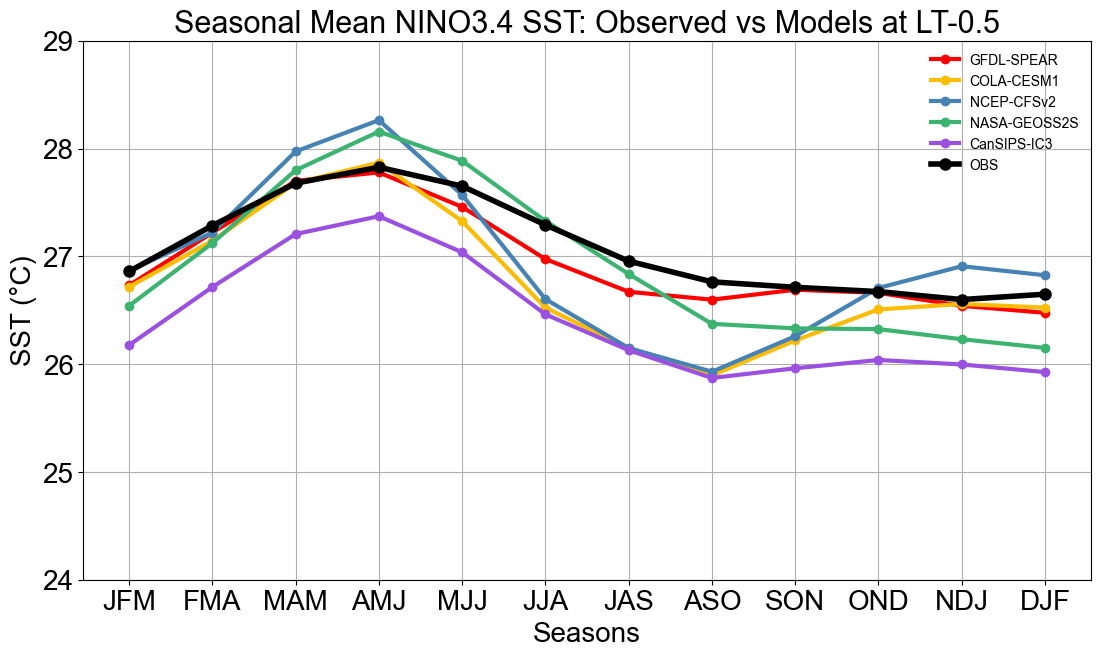

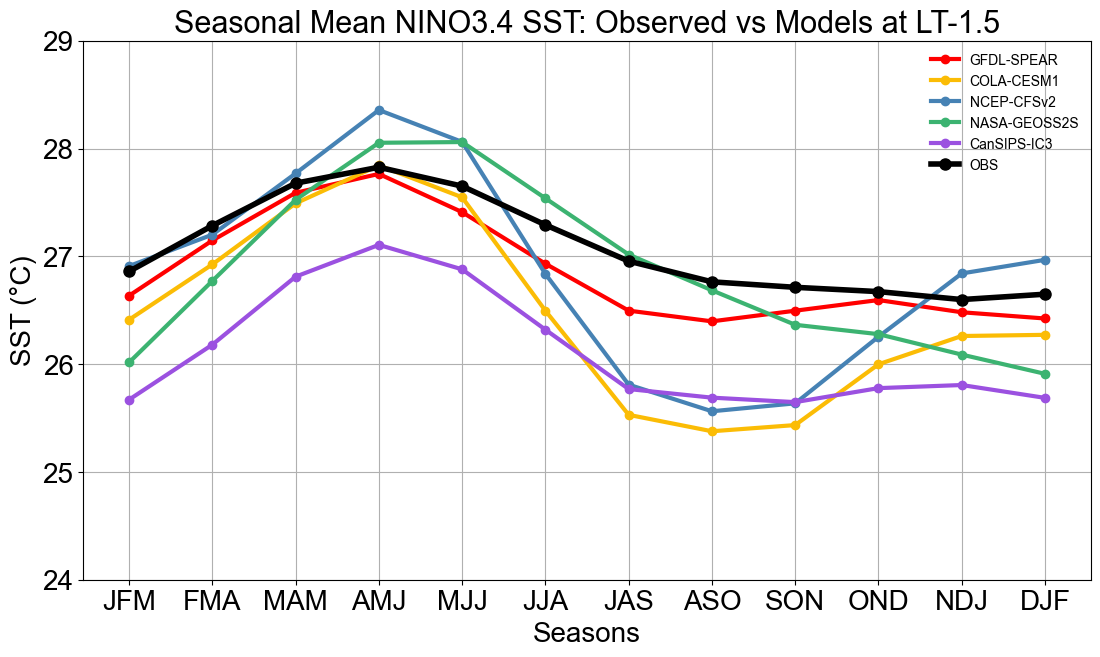

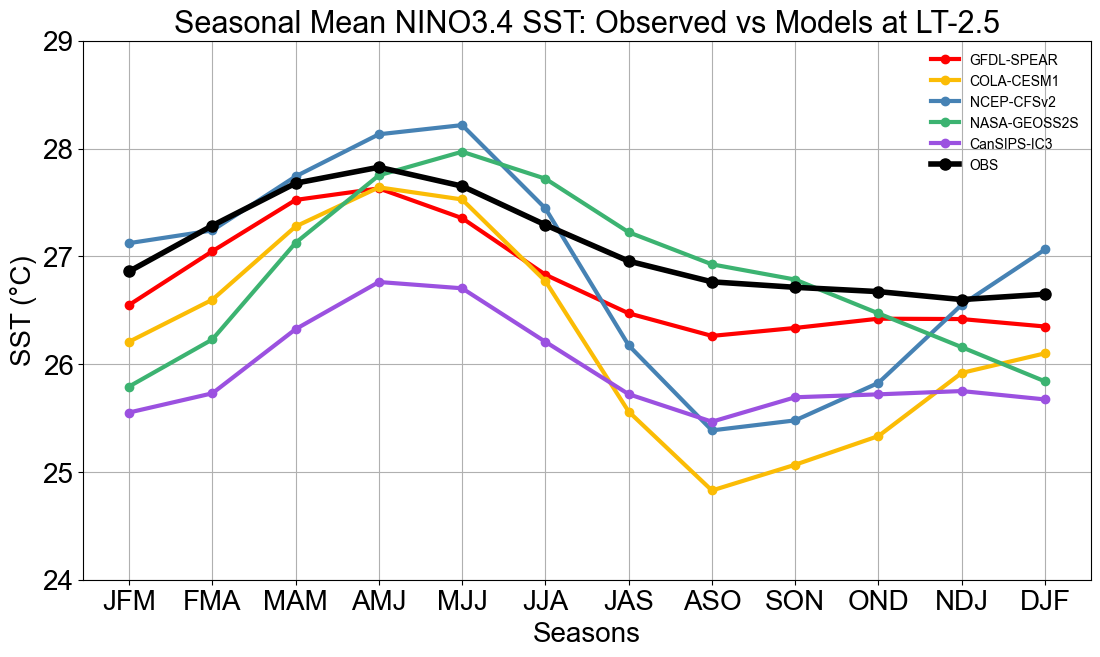

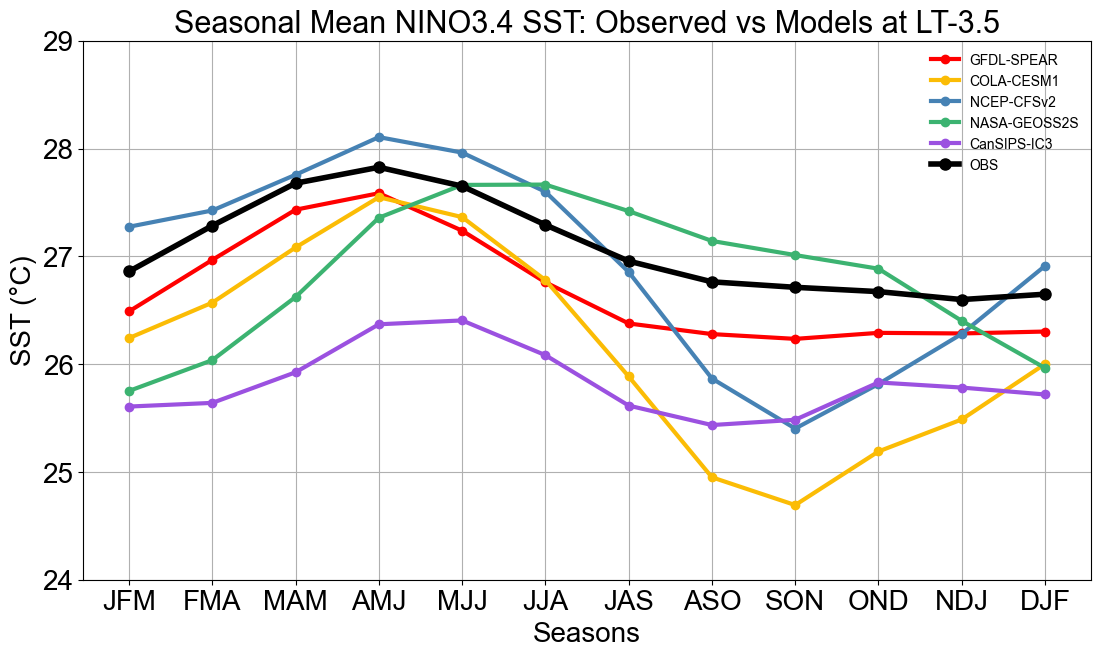

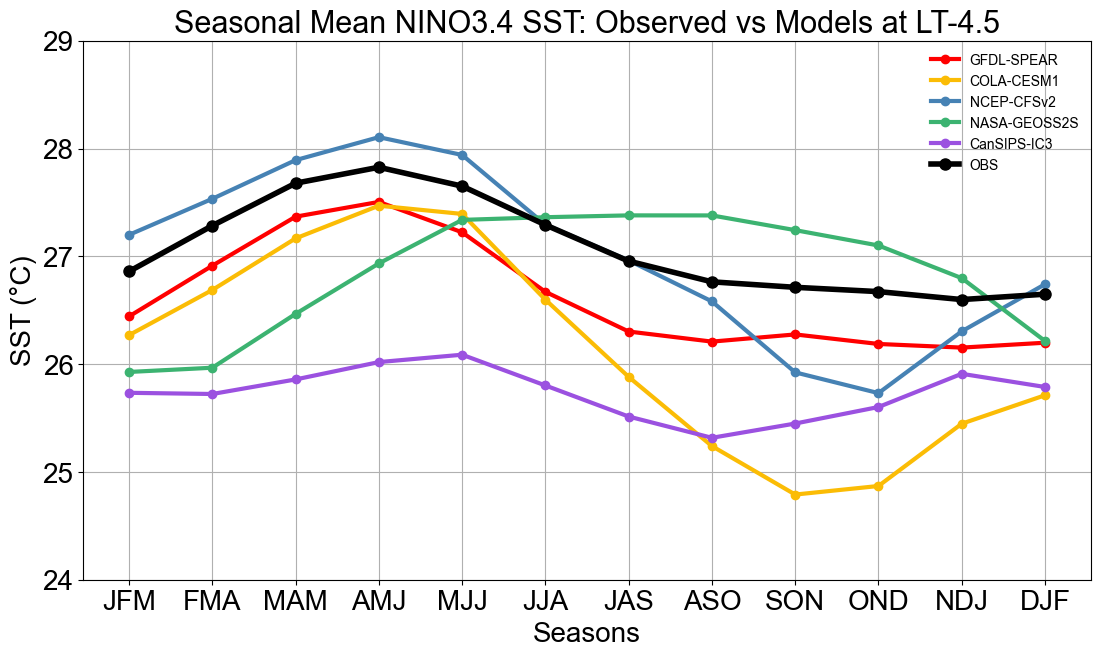

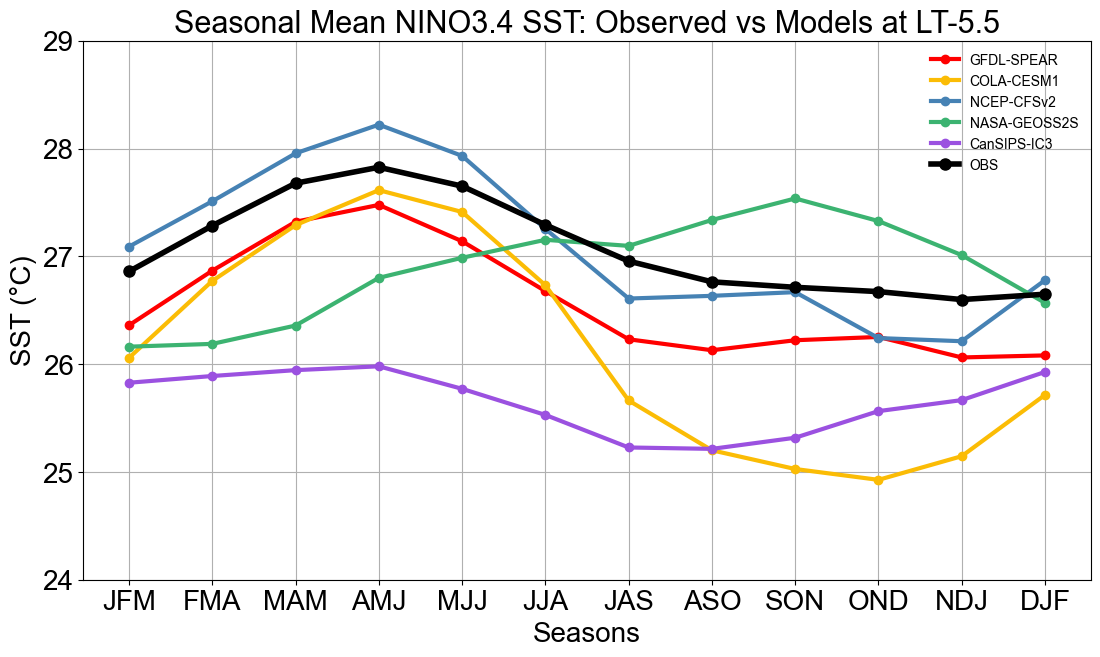

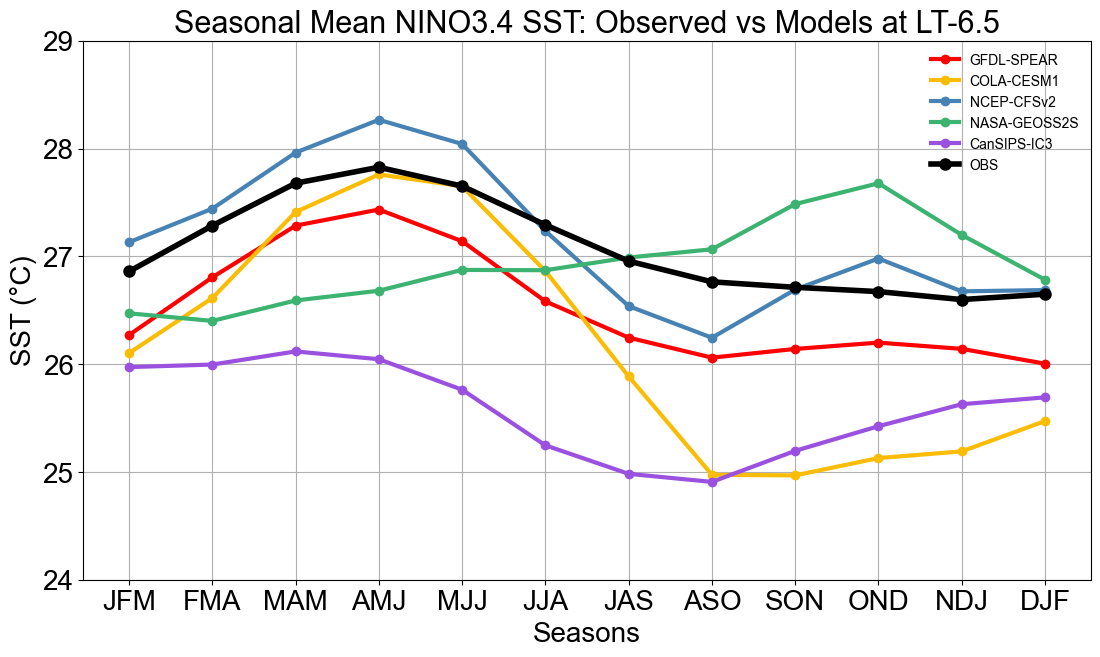

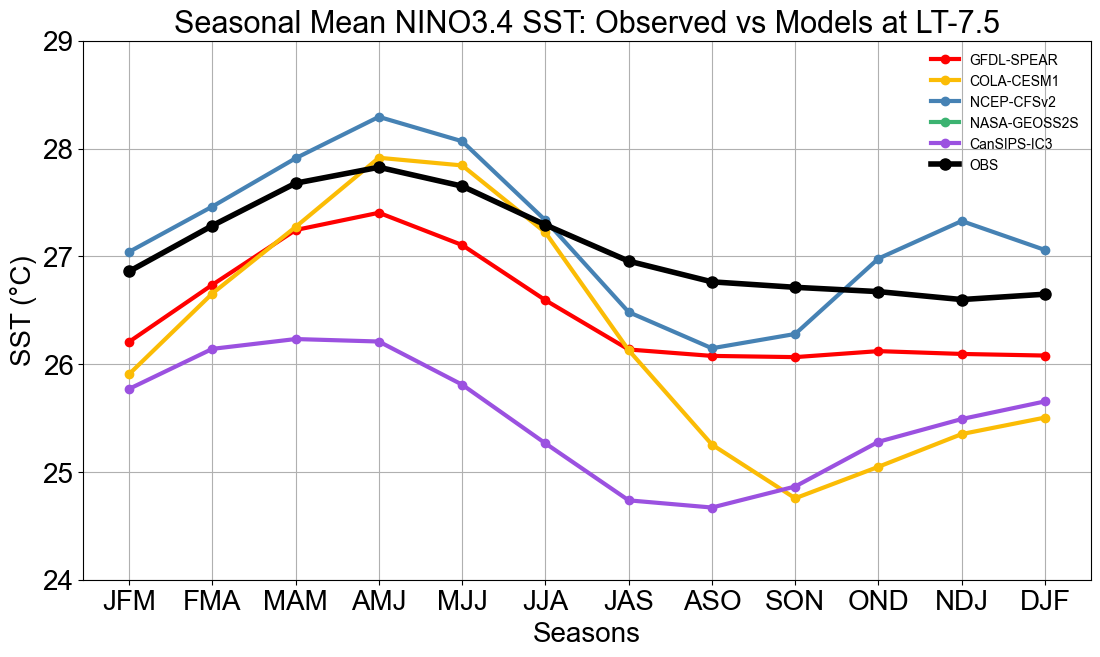

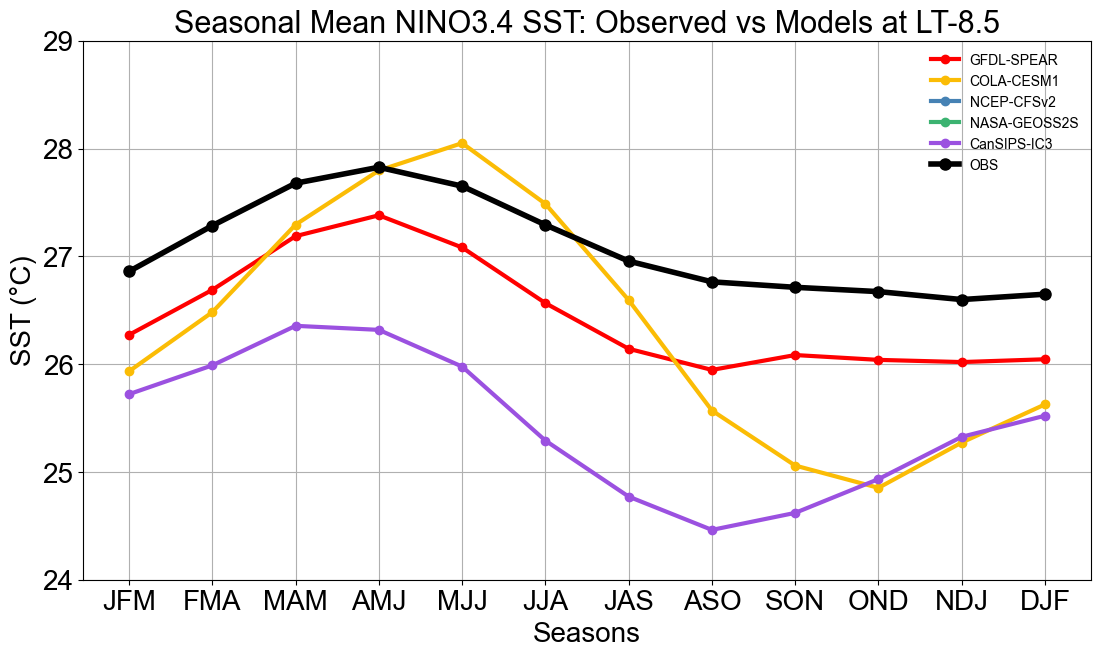

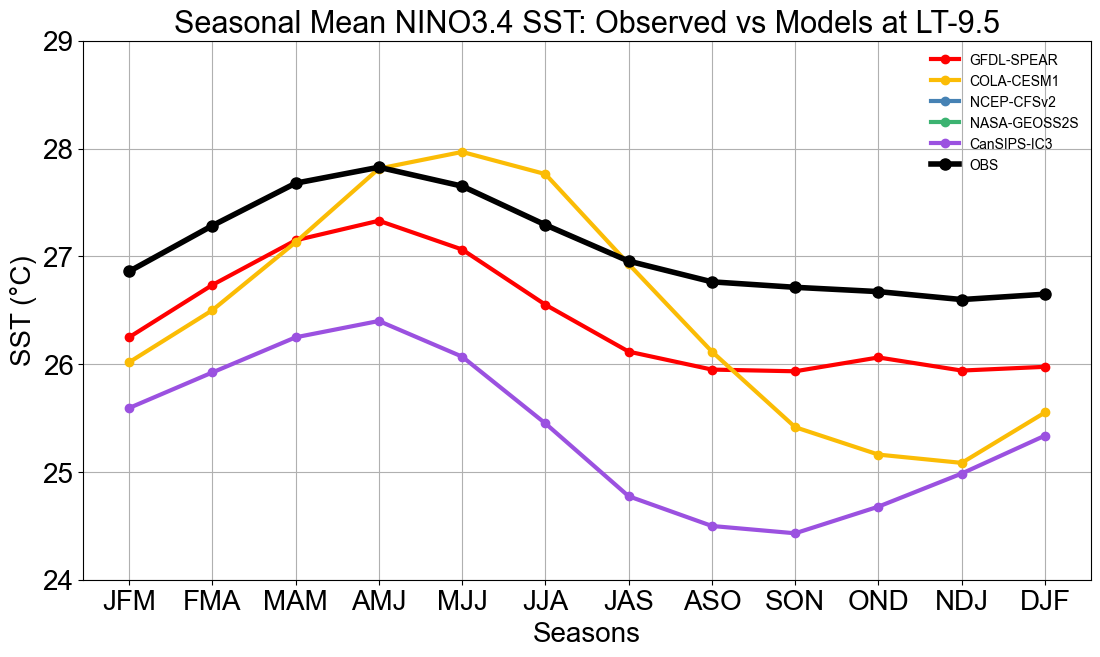

In [20]:
#follow this convention for all LDC graphs. 
def multimodel_sst_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['MEAN_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['MEAN_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['MEAN_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['MEAN_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['MEAN_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['NINO3.4_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Mean NINO3.4 SST: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=24, ymax=29)
    plt.savefig(f'../Plots/seasonal_mean_lead{lead}.png', format='png')
    # Show the plot
    plt.show()

i = 1
while i < 11:
    multimodel_sst_visualizer(i)
    i += 1


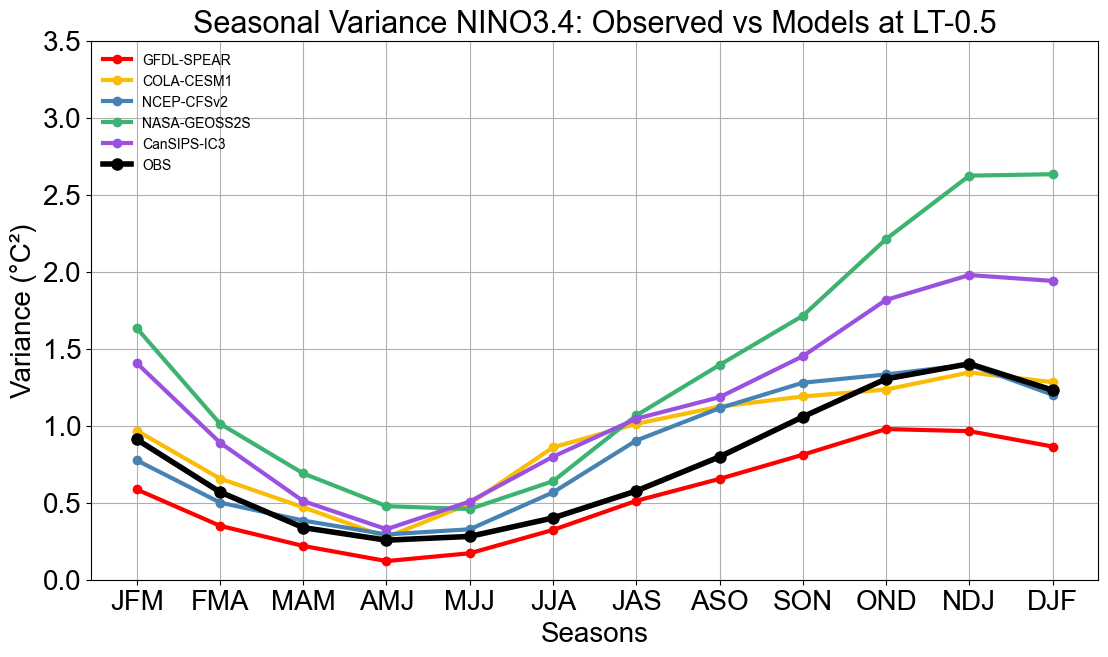

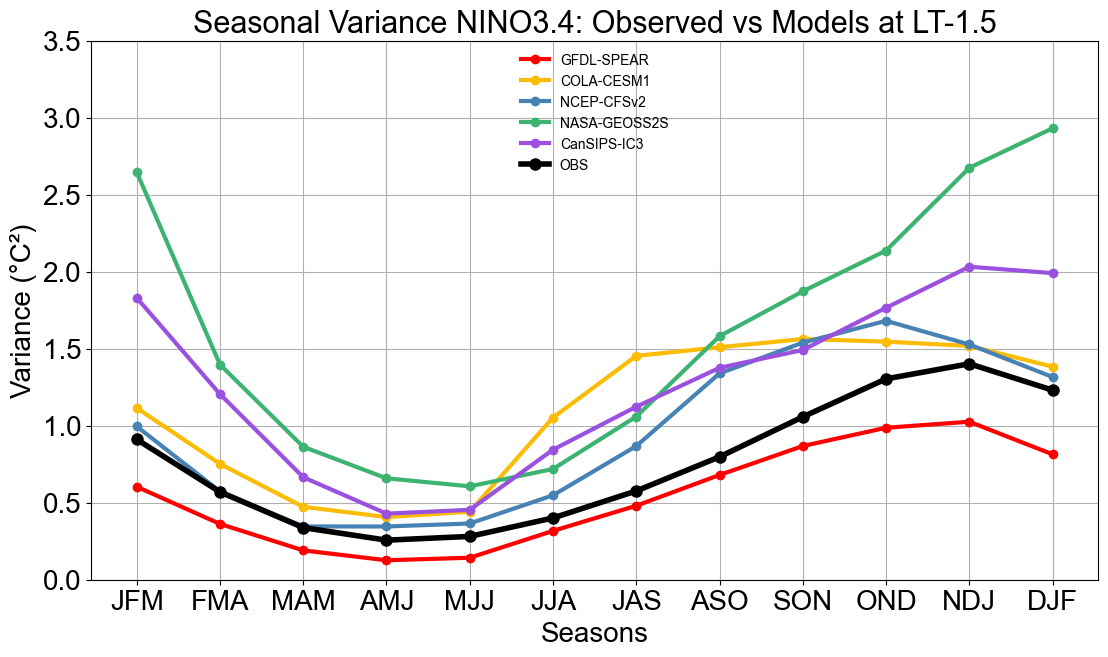

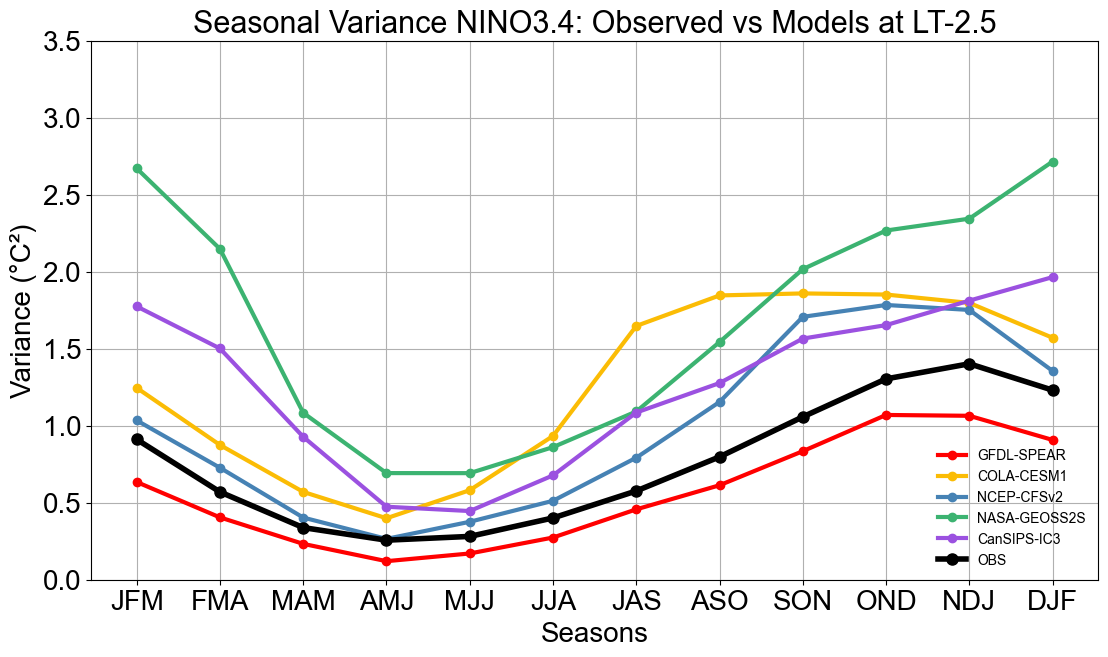

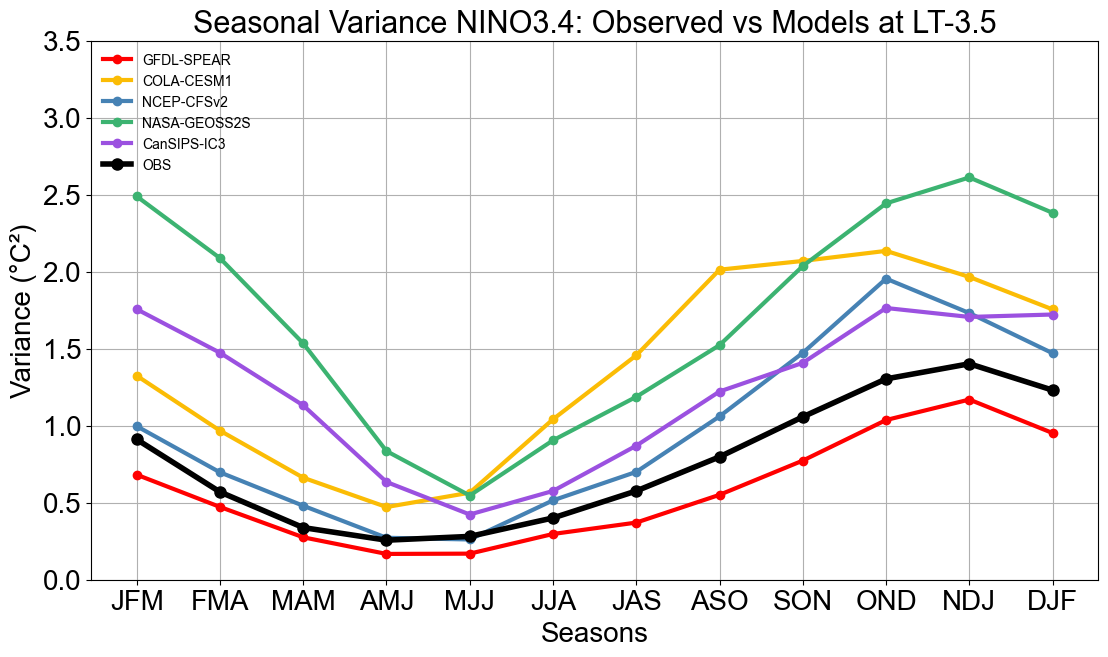

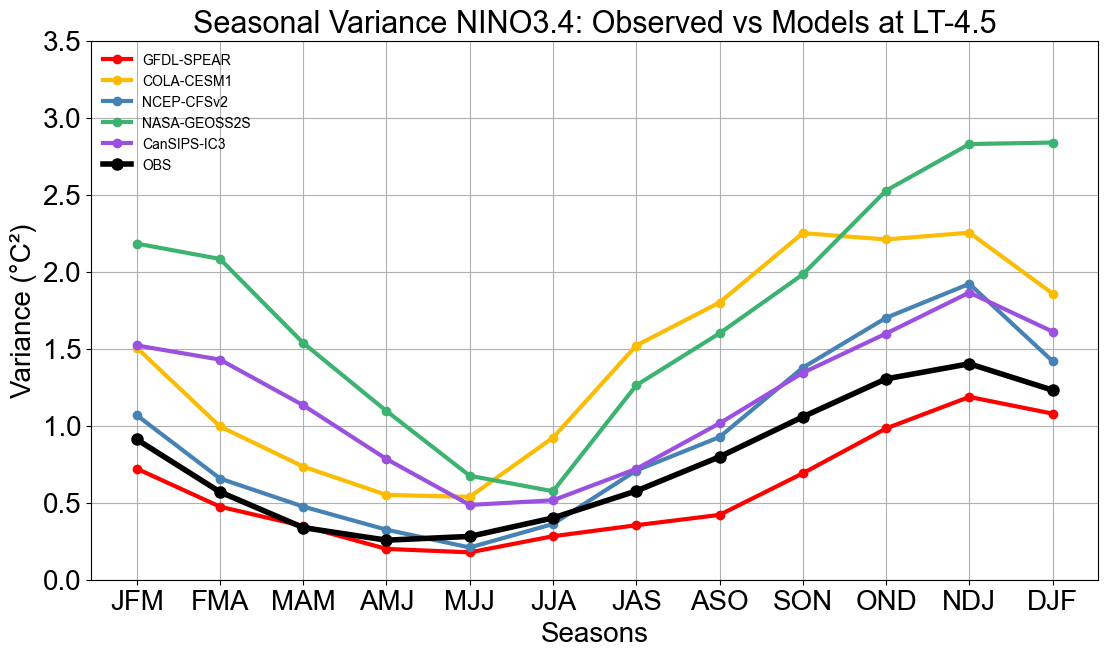

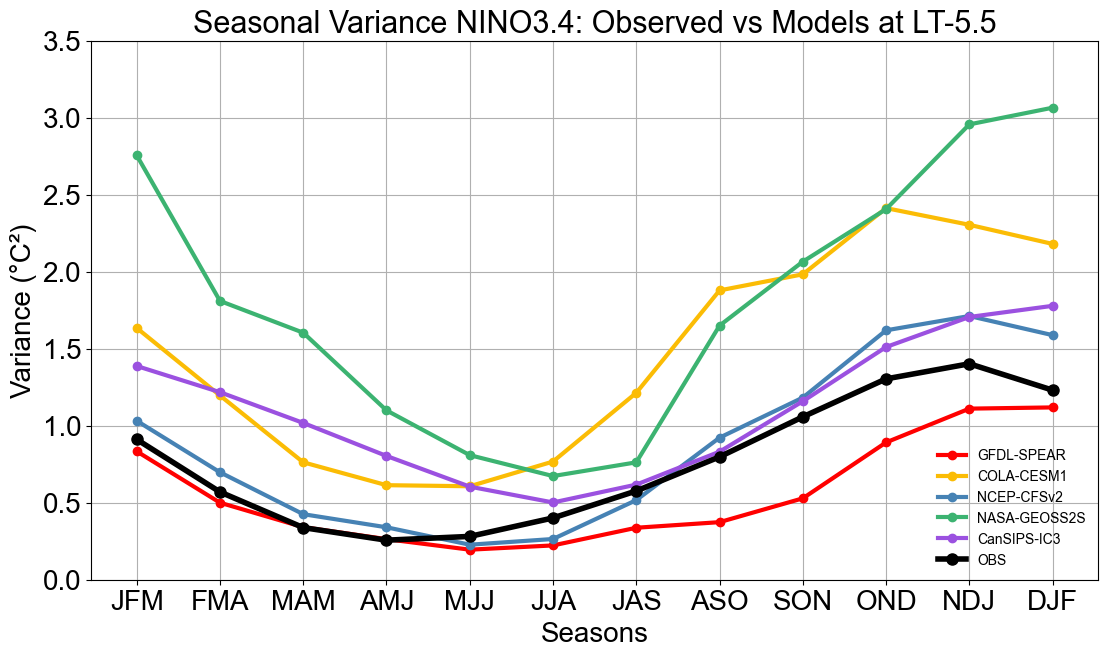

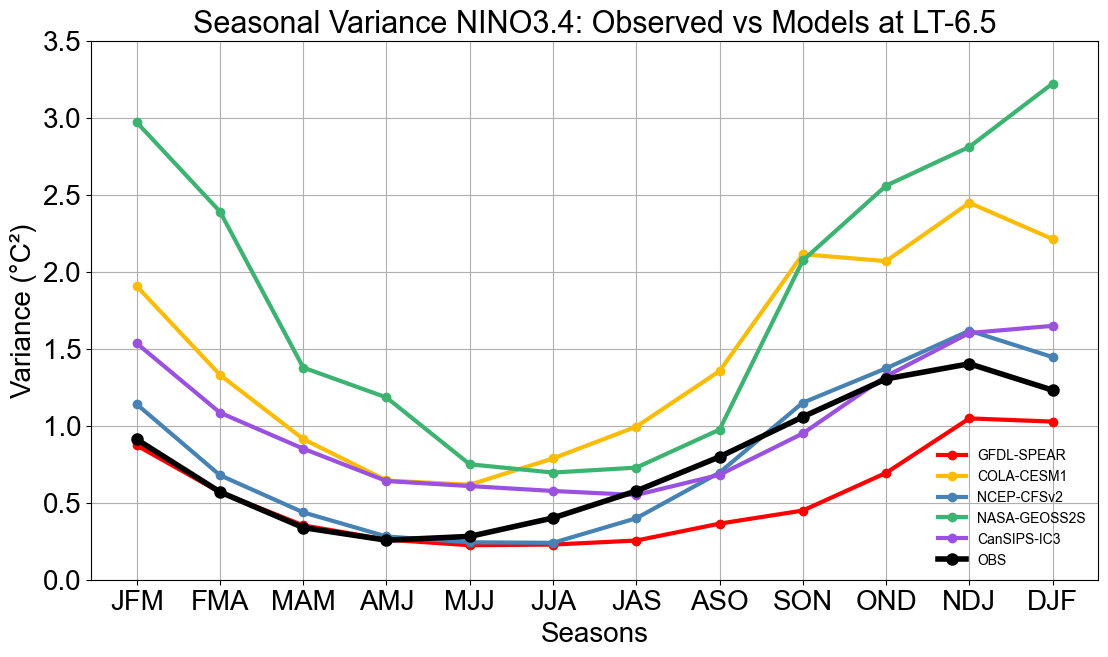

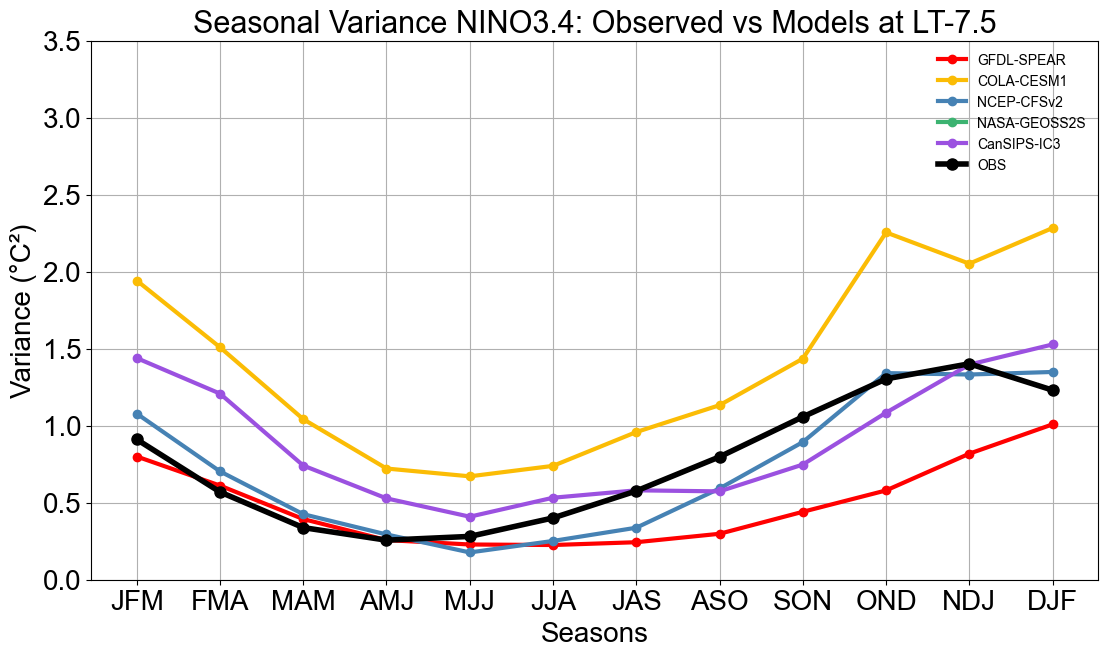

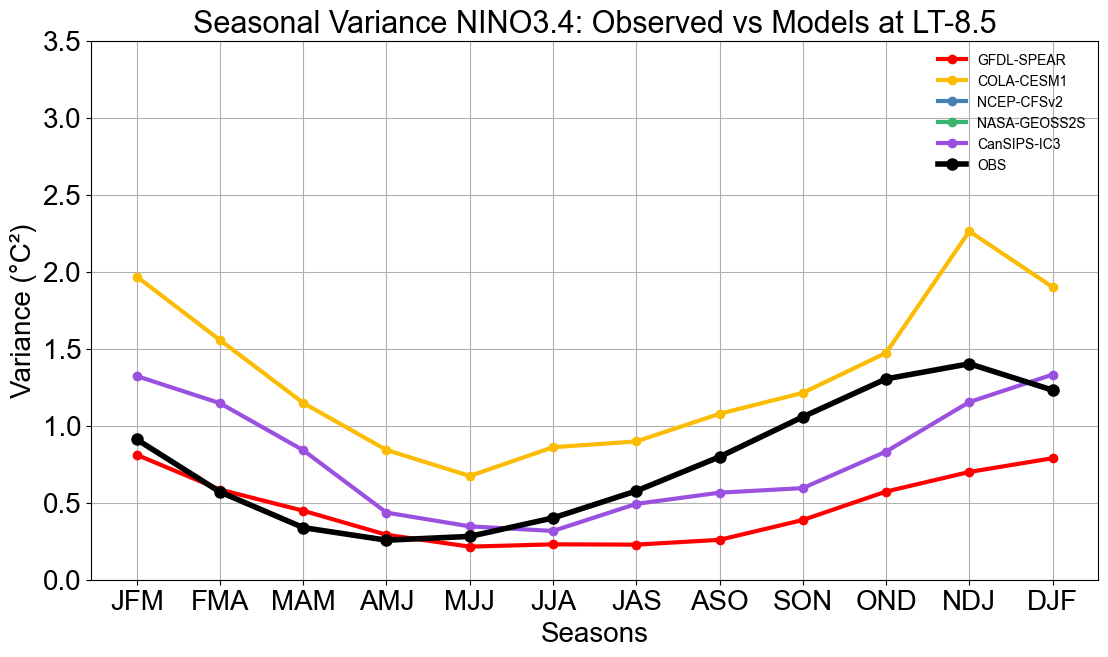

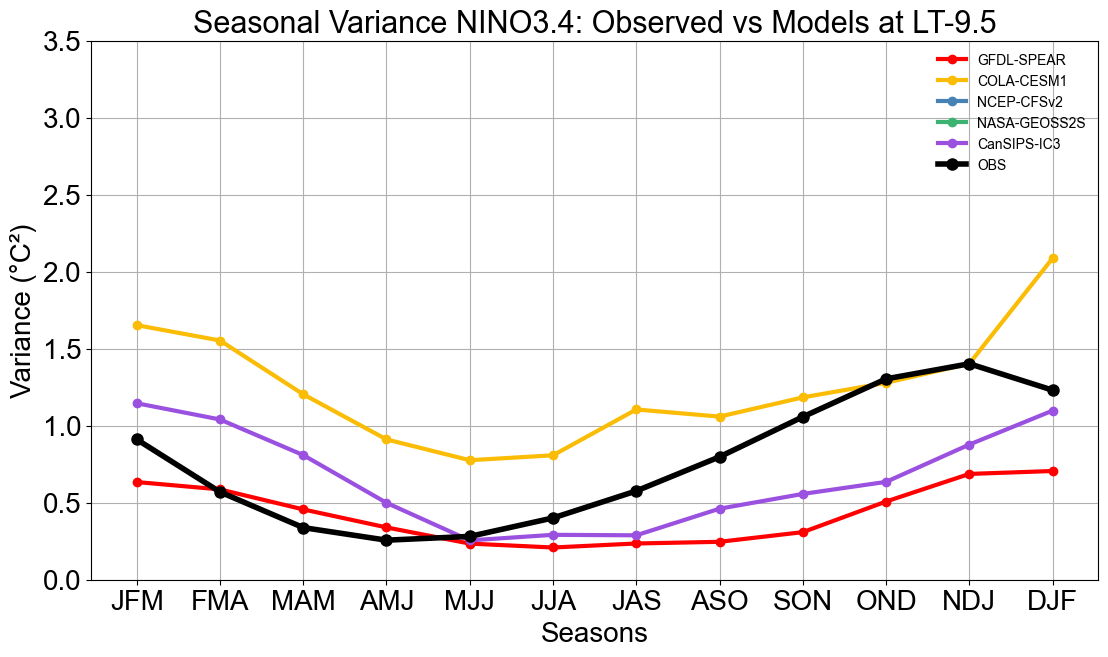

In [21]:
def multimodel_var_visualizer(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))
    
    plt.plot(gfdl_stat_dfs[f'lead{lead}']['SZN'], gfdl_stat_dfs[f'lead{lead}']['VAR_SST_GFDL_SPEAR'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(cola_stat_dfs[f'lead{lead}']['SZN'], cola_stat_dfs[f'lead{lead}']['VAR_SST_COLA_CESM1'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(ncep_stat_dfs[f'lead{lead}']['SZN'], ncep_stat_dfs[f'lead{lead}']['VAR_SST_NCEP_CFSv2'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_stat_dfs[f'lead{lead}']['SZN'], nasa_stat_dfs[f'lead{lead}']['VAR_SST_NASA_GEOSS2S'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_stat_dfs[f'lead{lead}']['SZN'], canada_stat_dfs[f'lead{lead}']['VAR_SST_CanSIPS_IC3'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC3')
    plt.plot(obs_nino3_4['SZN'], obs_nino3_4['VARIANCE_L3'], marker='o',markersize=8, linewidth=4, linestyle='-', color='black', label = 'OBS')
    
    # Customize the plot
    plt.title(f'Seasonal Variance NINO3.4: Observed vs Models at LT-{lead-0.5}',size = 22)
    plt.xlabel('Seasons',size = 20)
    plt.ylabel('Variance (°C²)', size = 20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=0, ymax=3.5)
    # Show the plot
    plt.savefig(f'../Plots/seasonal_variance_lead{lead}.png', format='png')
    plt.show()
i = 1
while i < 11:
    multimodel_var_visualizer(i)
    i += 1

